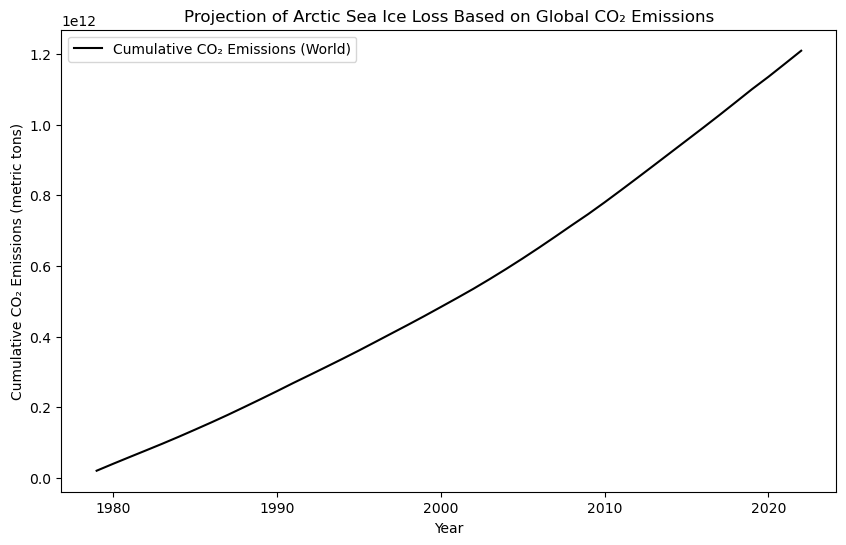

co2 in 1979 19603001000.0
increase in co2 (ton) since 1979: 1.209960571·10^12


In [2]:

import pandas as pd
import numpy as np
from sklearn.linear_model import LinearRegression
import matplotlib.pyplot as plt

# Load the data
file_path = 'annual-co2-emissions-per-country.csv'  # Replace with your actual file path
data = pd.read_csv(file_path)



# Step 1: Filter data to include only global (world) emissions
world_data = data[(data["Entity"] == "World") & (data["Year"] >= 1979)]
global_emissions = world_data.groupby("Year")["Annual CO₂ emissions"].sum().reset_index()

# Step 2: Fit a linear regression model to predict future CO₂ emissions based on global data
X = global_emissions[["Year"]]
y = global_emissions["Annual CO₂ emissions"]

cumsum = np.array(y.cumsum())

increase = cumsum[-1]


increase = increase/1e12


plt.figure(figsize=(10, 6))
plt.plot(X, cumsum, label="Cumulative CO₂ Emissions (World)", color='black')
#plt.axhline(required_cumulative_emissions, color='red', linestyle='--', label="Ice-Free Threshold")
#plt.axvline(ice_free_year, color='white', linestyle='--', label=f"Predicted Ice-Free Year: {ice_free_year}")
#plt.scatter(global_emissions["Year"].max(), cumulative_emissions[43], color='blue', zorder=5, label="Year before prediction begins")
plt.xlabel("Year")
plt.ylabel("Cumulative CO₂ Emissions (metric tons)")
plt.legend()
plt.title("Projection of Arctic Sea Ice Loss Based on Global CO₂ Emissions")
#plt.savefig("notz_stove_prediction.png")
plt.show()



print(f"co2 in 1979 {y[0]}")

print(f"increase in co2 (ton) since 1979: {increase}·10^12")


In [3]:

# load data
import scipy.io
mat = scipy.io.loadmat('osisaf_nh_SIE_monthly_2')

months = np.concatenate(([np.arange(12) + 1 for i in range(517//12 + 1)]) )
months = months[:517]

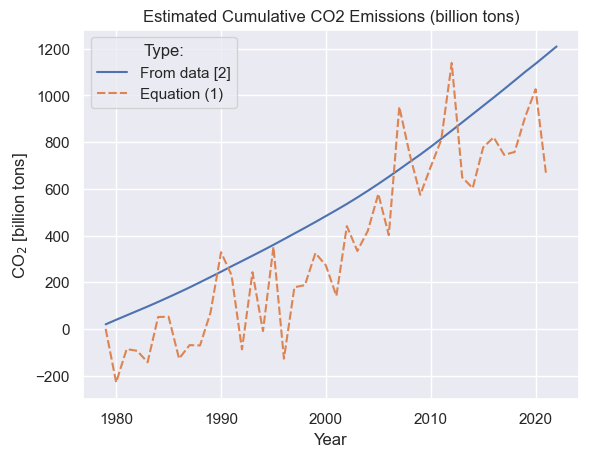

In [4]:

import matplotlib.pyplot as plt

from scipy.io import loadmat

data = loadmat('/Users/nikolajhertz/Desktop/GIT/Remote_Sensing_Arctic/co2.mat')

x = data['abe']


import seaborn as sns
import pandas as pd


co2 = np.array([*cumsum, *x.squeeze()])

trillion_co2 = list(co2 / 1e9)


plt.close()
df = pd.DataFrame({"year": list(X['Year']) + list(X['Year']), 
                   "co2": trillion_co2 + [None],
                   "Type:": ['From data [2]']*len(X['Year']) + ['Equation (1)']*len(X['Year'])})
sns.set_context("notebook", font_scale=1.5, rc={"lines.linewidth": 2.5})
#sns.set_style("ticks")
#sns.axes_style()
sns.set_theme()
ax = sns.lineplot(df, x='year', y='co2',hue='Type:', style='Type:')
ax.set(xlabel='Year', 
       ylabel="CO$_2$ [billion tons]", 
       title='Estimated Cumulative CO2 Emissions (billion tons)')
plt.savefig('test.png')
plt.show()


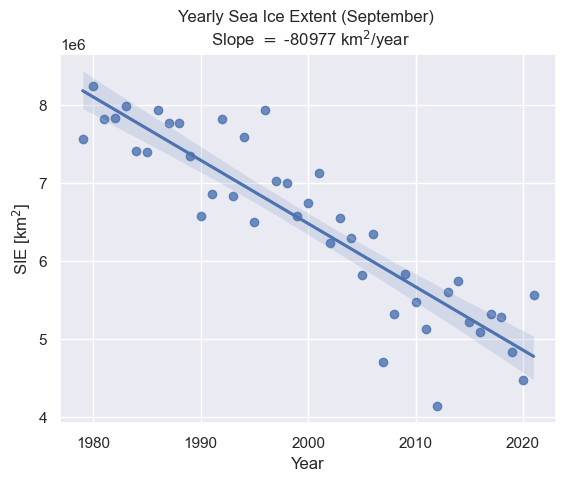

In [5]:

data_sep = loadmat('/Users/nikolajhertz/Desktop/GIT/Remote_Sensing_Arctic/sie_sep.mat')

df_sep = {'year': np.array(X['Year'])[:-1],
          'x': data_sep['SIE_sep'].squeeze(),}


a, b = np.polyfit(np.array(X['Year'])[:-1], data_sep['SIE_sep'].squeeze(), 1)

sns.set_context("notebook", font_scale=1.5, rc={"lines.linewidth": 2.5})
sns.set_theme()

ax = sns.regplot(x="year", y="x", data=df_sep)
ax.set(xlabel='Year', 
       ylabel="SIE [km$^2$]", 
       title=f'Yearly Sea Ice Extent (September) \n Slope $=$ {a:.0f} km$^2$/year')


plt.savefig('task1_problem1_sep.png')
plt.show()


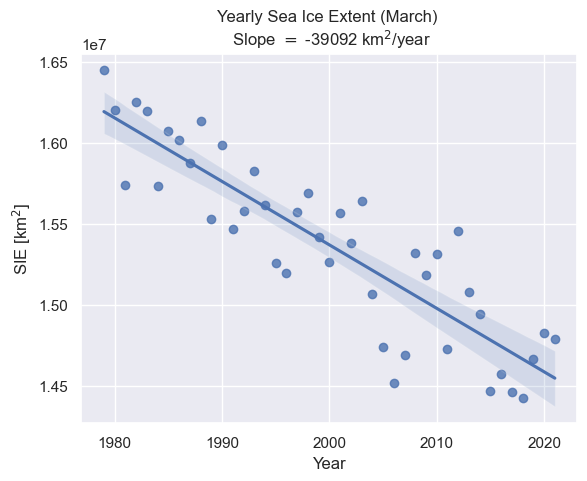

In [6]:

data_mar = loadmat('/Users/nikolajhertz/Desktop/GIT/Remote_Sensing_Arctic/sie_mar.mat')


df_mar = {'year': np.array(X['Year'])[:-1],
          'x': data_mar['SIE_sep'].squeeze(),}


a, b = np.polyfit(np.array(X['Year'])[:-1], data_mar['SIE_sep'].squeeze(), 1)

sns.set_context("notebook", font_scale=1.5, rc={"lines.linewidth": 2.5})
sns.set_theme()

ax = sns.regplot(x="year", y="x", data=df_mar)
ax.set(xlabel='Year', 
       ylabel="SIE [km$^2$]", 
       title=f'Yearly Sea Ice Extent (March) \n Slope $=$ {a:.0f} km$^2$/year')


plt.savefig('task1_problem1_mar.png')
plt.show()

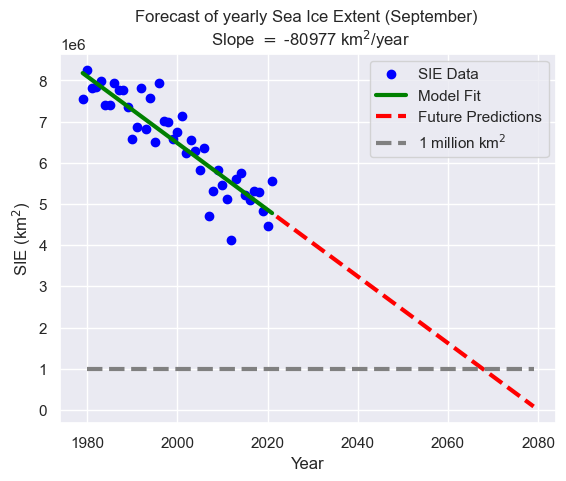

In [9]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression


# Create and train the model

xx = df_sep_['year'].reshape(-1,1)
yy = df_sep_['x']
model = LinearRegression()
model.fit(xx, df_sep_['x'])

# Extend the range for future predictions
future_years = np.array(range(2022,2080)).reshape(-1, 1)
predicted_values = model.predict(future_years)

# Plotting
plt.scatter(xx, yy, color='blue', label='SIE Data')
plt.plot(xx, model.predict(xx), color='green', label='Model Fit', linewidth=3)
#plt.scatter(future_years, predicted_values, color='red', label='Future Predictions')
plt.plot(future_years, predicted_values, color='red', linestyle='--', label='Future Predictions', linewidth=3)
plt.plot(range(1980, 2080), [1e6]*100, color='gray', linestyle='--', label='1 million km$^2$', linewidth=3)
plt.xlabel('Year')
plt.ylabel('SIE (km$^2$)')
plt.title(f'Forecast of yearly Sea Ice Extent (September) \n Slope $=$ {a:.0f} km$^2$/year')
plt.legend()
plt.savefig('task1_problem2_forecast.png')
plt.show()

/Users/nikolajhertz/anaconda3/envs/sem_5/lib/python3.9/site-packages/sklearn/base.py:464: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


The Arctic is projected to be ice-free by the year 2045 based on global emissions.


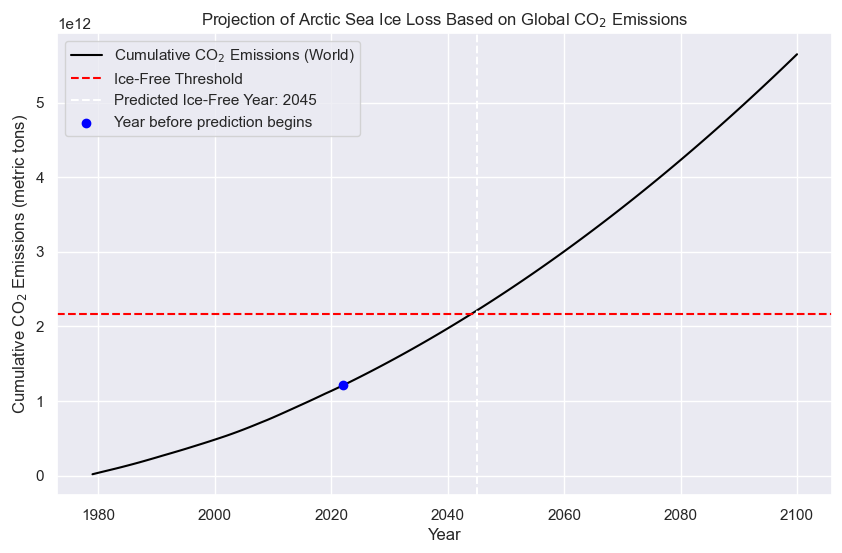

In [13]:
import pandas as pd
import numpy as np
from sklearn.linear_model import LinearRegression
import matplotlib.pyplot as plt

# Load the data
file_path = 'annual-co2-emissions-per-country.csv'  # Replace with your actual file path
data = pd.read_csv(file_path)

# Step 1: Filter data to include only global (world) emissions
world_data = data[(data["Entity"] == "World") & (data["Year"] >= 1979)]
global_emissions = world_data.groupby("Year")["Annual CO₂ emissions"].sum().reset_index()

# Step 2: Fit a linear regression model to predict future CO₂ emissions based on global data
X = global_emissions[["Year"]]
y = global_emissions["Annual CO₂ emissions"]
model = LinearRegression()
model.fit(X, y)

# Step 3: Predict future emissions up to a target year (e.g., 2100)
future_years = np.arange(global_emissions["Year"].max() + 1, 2101).reshape(-1, 1)
predicted_emissions = model.predict(future_years)

# Combine historical and predicted emissions data
all_years = np.concatenate([X, future_years])
all_emissions = np.concatenate([y, predicted_emissions])

# Calculate cumulative emissions from global data
cumulative_emissions = np.cumsum(all_emissions)

# Constants for Notz and Stroeve model
current_ice_extent_km2 = 7.5e6  # Current sea ice extent in km²
target_ice_extent_km2 = 1e6     # Target sea ice extent in km²
emission_sensitivity = 3        # Sensitivity in m² per ton of CO₂

# Calculate the threshold in terms of cumulative emissions needed to reach ice-free Arctic
ice_loss_threshold_m2 = (current_ice_extent_km2 - target_ice_extent_km2) * 1e6  # km² to m²
required_cumulative_emissions = ice_loss_threshold_m2 / emission_sensitivity

# Find the projected year when cumulative emissions exceed the threshold
ice_free_year = all_years[np.argmax(cumulative_emissions >= required_cumulative_emissions)][0]

# Output the projected ice-free year
print(f"The Arctic is projected to be ice-free by the year {ice_free_year} based on global emissions.")

# Plot cumulative emissions, ice-free threshold, and the predicted year
plt.figure(figsize=(10, 6))
plt.plot(all_years, cumulative_emissions, label="Cumulative CO$_2$ Emissions (World)", color='black')
plt.axhline(required_cumulative_emissions, color='red', linestyle='--', label="Ice-Free Threshold")
plt.axvline(ice_free_year, color='white', linestyle='--', label=f"Predicted Ice-Free Year: {ice_free_year}")
plt.scatter(global_emissions["Year"].max(), cumulative_emissions[43], color='blue', zorder=5, label="Year before prediction begins")
plt.xlabel("Year")
plt.ylabel("Cumulative CO$_2$ Emissions (metric tons)")
plt.legend()
plt.title("Projection of Arctic Sea Ice Loss Based on Global CO$_2$ Emissions")
plt.savefig("notz_stove_prediction.png")
plt.show()